In [1]:
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(3, activation='softmax'))

from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

C:\Users\apple\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'Downloads/ramen/train'
validation_dir = 'Downloads/ramen/validation'

# rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,     # directory
        target_size=(150, 150),     # input shape (resized to 150x150)
        batch_size=20,
        class_mode='categorical')    # categorical labels

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 7081 images belonging to 3 classes.
Found 1134 images belonging to 3 classes.


In [3]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=354,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=56)

Epoch 1/20
354/354 [==============================] - 606s 2s/step - loss: 1.0235 - acc: 0.4818 - val_loss: 1.0156 - val_acc: 0.4875
Epoch 2/20
354/354 [==============================] - 554s 2s/step - loss: 0.9353 - acc: 0.5576 - val_loss: 0.9883 - val_acc: 0.5116
Epoch 3/20
354/354 [==============================] - 557s 2s/step - loss: 0.8976 - acc: 0.5866 - val_loss: 0.9701 - val_acc: 0.5304
Epoch 4/20
354/354 [==============================] - 559s 2s/step - loss: 0.8611 - acc: 0.6064 - val_loss: 0.8591 - val_acc: 0.6205
Epoch 5/20
354/354 [==============================] - 587s 2s/step - loss: 0.8274 - acc: 0.6292 - val_loss: 0.8878 - val_acc: 0.5884
Epoch 6/20
354/354 [==============================] - 595s 2s/step - loss: 0.7955 - acc: 0.6458 - val_loss: 0.8424 - val_acc: 0.6196
Epoch 7/20
354/354 [==============================] - 579s 2s/step - loss: 0.7670 - acc: 0.6596 - val_loss: 0.8212 - val_acc: 0.6357
Epoch 8/20
354/354 [==============================] - 592s 2s/step - 

In [4]:
model.save('ramen')

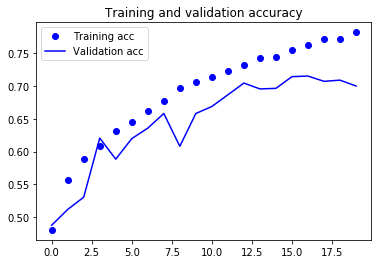

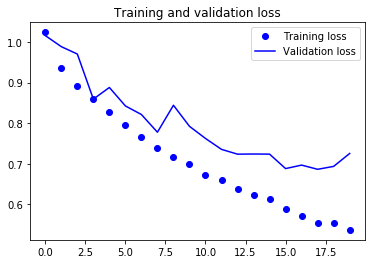

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
model = load_model('ramen')

test_dir = 'downloads/ramen/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=54)
print('test loss:', test_loss)
print('test acc:', test_acc)

Found 1078 images belonging to 3 classes.
test loss: 0.6364766670069579
test acc: 0.7346938798732793
